In [1]:
import requests

In [2]:
import pandas as pd

In [3]:
#Get the website link
url_get = requests.get("https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31")

In [4]:
from bs4 import BeautifulSoup

In [5]:
#Use beautiful soup to make it tidier
soup = BeautifulSoup(url_get.content,"html.parser")

In [6]:
#Find the relevant key and attributes
movie = soup.find('div', attrs={'class':'lister-list'})

In [7]:
print(movie.prettify()[1:200])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt2527338">
   </div>
  </div>
  <d


In [8]:
#Votes and Gross (though Gross will be deleted soon after)
temp0 = []
for i in range(0,50):
    name = movie.find_all('p', attrs={'class':'sort-num_votes-visible'})[i]
    name = name.text.strip()
    name
    
    temp0.append(name)
    
temp0

['Votes:\n320,391\n| Gross:\n$515.20M',
 'Votes:\n167,680',
 'Votes:\n67,651',
 'Votes:\n37,861',
 'Votes:\n463,576\n| Gross:\n$142.50M',
 'Votes:\n131,338',
 'Votes:\n403,699\n| Gross:\n$53.37M',
 'Votes:\n12,765',
 'Votes:\n12,588',
 'Votes:\n118,865',
 'Votes:\n300,060\n| Gross:\n$165.36M',
 'Votes:\n307,042\n| Gross:\n$159.23M',
 'Votes:\n715,678\n| Gross:\n$858.37M',
 'Votes:\n785,592\n| Gross:\n$335.45M',
 'Votes:\n611',
 'Votes:\n22,572',
 'Votes:\n252,809',
 'Votes:\n211,900\n| Gross:\n$0.35M',
 'Votes:\n460,993',
 'Votes:\n144,000',
 'Votes:\n151,722\n| Gross:\n$27.33M',
 'Votes:\n102,818\n| Gross:\n$108.10M',
 'Votes:\n67,699\n| Gross:\n$80.55M',
 'Votes:\n5,447',
 'Votes:\n2,077',
 'Votes:\n131,976',
 'Votes:\n25,972',
 'Votes:\n144,411\n| Gross:\n$316.83M',
 'Votes:\n3,642',
 'Votes:\n162,205',
 'Votes:\n101,902\n| Gross:\n$0.43M',
 'Votes:\n25,663',
 'Votes:\n6,745',
 'Votes:\n213,634\n| Gross:\n$117.62M',
 'Votes:\n288,170',
 'Votes:\n2,602',
 'Votes:\n33,890',
 'Votes:\n

In [9]:
#Name of movie
temp = []
for i in range(0, 50):
    nm = movie.find_all('h3')[i]
    for wrapper in nm.find_all('a', href = True):
        temp.append(wrapper.text)
        
temp

['Star Wars: Episode IX - The Rise of Skywalker',
 'The Mandalorian',
 'After Life',
 'Dead to Me',
 'Once Upon a Time... in Hollywood',
 'The Gentlemen',
 'Gisaengchung',
 'Bad Education',
 'The Lodge',
 'El hoyo',
 'Knives Out',
 '1917',
 'Avengers: Endgame',
 'Joker',
 'Reckoning',
 'What We Do in the Shadows',
 'The Witcher',
 'Jojo Rabbit',
 'Chernobyl',
 'The Boys',
 'Midsommar',
 'Little Women',
 'Hustlers',
 'NOS4A2',
 'The Wretched',
 'Sex Education',
 'Code 8',
 'Jumanji: The Next Level',
 'The Assistant',
 'Uncut Gems',
 'The Lighthouse',
 'Batwoman',
 'Harley Quinn',
 'Ford v Ferrari',
 'The Irishman',
 'Brassic',
 'The Morning Show',
 '6 Underground',
 'It Chapter Two',
 'The Lion King',
 'Bombshell',
 'Hanna',
 'Portrait de la jeune fille en feu',
 'Ramy',
 'Euphoria',
 'Frozen II',
 'Doctor Sleep',
 'Spider-Man: Far from Home',
 'Angel Has Fallen',
 'Aladdin']

In [10]:
#Meta score and ratings (but the ratings will be taken individually and this one will be deleted subsequently)
temp2 = []

for i in range(0, 50):
    stuff = movie.find_all('div', attrs = {'class': 'ratings-bar'})[i]
    stuff = stuff.text.strip()
    temp2.append(stuff)
temp2


['6.7\n\n\n\n\nRate this\n\n\n\n\n\n\n\xa0\n\xa0\n\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n\n6.7/10\nX\n\xa0\n\n\n\n53        \n        Metascore',
 '8.7\n\n\n\n\nRate this\n\n\n\n\n\n\n\xa0\n\xa0\n\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n\n8.7/10\nX',
 '8.5\n\n\n\n\nRate this\n\n\n\n\n\n\n\xa0\n\xa0\n\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n\n8.5/10\nX',
 '8.1\n\n\n\n\nRate this\n\n\n\n\n\n\n\xa0\n\xa0\n\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n\n8.1/10\nX',
 '7.7\n\n\n\n\nRate this\n\n\n\n\n\n\n\xa0\n\xa0\n\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n\n7.7/10\nX\n\xa0\n\n\n\n83        \n        Metascore',
 '7.9\n\n\n\n\nRate this\n\n\n\n\n\n\n\xa0\n\xa0\n\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n\n7.9/10\nX\n\xa0\n\n\n\n51        \n        Metascore',
 '8.6\n\n\n\n\nRate this\n\n\n\n\n\n\n\xa0\n\xa0\n\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n\n8.6/10\nX\n\xa0\n\n\n\n96        \n        Metascore',
 '7.2\n\n\n\n\nRate this\n\n\n\n\n\n\n\xa0\n\xa0\n\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n\n7.2/10\nX\n\xa0\n\n\n\n79        \n        Metascore',
 '6.1\n\n

In [11]:
#Ratings
temp3 = []

for i in range(0,50):
    ratings = movie.find_all('strong')[i]
    ratings = ratings.text.strip()
    temp3.append(ratings)
    
temp3

['6.7',
 '8.7',
 '8.5',
 '8.1',
 '7.7',
 '7.9',
 '8.6',
 '7.2',
 '6.1',
 '7.0',
 '7.9',
 '8.3',
 '8.4',
 '8.5',
 '6.5',
 '8.4',
 '8.3',
 '7.9',
 '9.4',
 '8.7',
 '7.1',
 '7.9',
 '6.3',
 '6.7',
 '5.8',
 '8.3',
 '6.1',
 '6.7',
 '5.9',
 '7.5',
 '7.6',
 '3.5',
 '8.4',
 '8.1',
 '7.9',
 '8.2',
 '8.4',
 '6.1',
 '6.6',
 '6.9',
 '6.8',
 '7.5',
 '8.2',
 '8.0',
 '8.3',
 '6.9',
 '7.4',
 '7.5',
 '6.4',
 '7.0']

In [12]:
temp0 = pd.Series(temp0, name = 'Votes')

In [13]:
temp = pd.Series(temp, name = 'Movie Name')

In [14]:
temp2 = pd.Series(temp2, name = 'Meta Score')

In [15]:
temp3 = pd.Series(temp3, name = 'Ratings')

In [16]:
df = pd.concat([temp, temp0, temp2, temp3], axis = 1)

In [17]:
df

,Movie Name,Votes,Meta Score,Ratings
0,Star Wars: Episode IX - The Rise of Skywalker,"Votes:\n320,391\n| Gross:\n$515.20M",6.7\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,6.7
1,The Mandalorian,"Votes:\n167,680",8.7\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,8.7
2,After Life,"Votes:\n67,651",8.5\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,8.5
3,Dead to Me,"Votes:\n37,861",8.1\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,8.1
4,Once Upon a Time... in Hollywood,"Votes:\n463,576\n| Gross:\n$142.50M",7.7\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,7.7
5,The Gentlemen,"Votes:\n131,338",7.9\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,7.9
6,Gisaengchung,"Votes:\n403,699\n| Gross:\n$53.37M",8.6\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,8.6
7,Bad Education,"Votes:\n12,765",7.2\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,7.2
8,The Lodge,"Votes:\n12,588",6.1\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,6.1
9,El hoyo,"Votes:\n118,865",7.0\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,7.0


In [18]:
df['Votes'] = df['Votes'].str.replace("\n","")

In [19]:
df['Movie Name'] = df['Movie Name'].str.replace("Gisaengchung","Parasite")

In [20]:
# Importing re package for using regular expressions 
import re 
  
# Function to clean the votes
def Clean_names(Votes): 
    # Search for | in the name followed by 
    # any characters repeated any number of times 
    if re.search('\|.*', Votes): 
  
        # Extract the position of beginning of pattern 
        pos = re.search('\|.*', Votes).start() 
  
        # return the cleaned name 
        return Votes[:pos] 
  
    else: 
        # if clean up needed return the same name 
        return Votes
          

In [21]:
df['Votes'] = df['Votes'].apply(Clean_names) 

In [22]:
df

,Movie Name,Votes,Meta Score,Ratings
0,Star Wars: Episode IX - The Rise of Skywalker,"Votes:320,391",6.7\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,6.7
1,The Mandalorian,"Votes:167,680",8.7\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,8.7
2,After Life,"Votes:67,651",8.5\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,8.5
3,Dead to Me,"Votes:37,861",8.1\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,8.1
4,Once Upon a Time... in Hollywood,"Votes:463,576",7.7\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,7.7
5,The Gentlemen,"Votes:131,338",7.9\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,7.9
6,Parasite,"Votes:403,699",8.6\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,8.6
7,Bad Education,"Votes:12,765",7.2\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,7.2
8,The Lodge,"Votes:12,588",6.1\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,6.1
9,El hoyo,"Votes:118,865",7.0\n\n\n\n\nRate this\n\n\n\n\n\n\n \n \n\n1\...,7.0


In [23]:
df['Votes'] = df['Votes'].str.replace("Votes:","")

In [24]:
df['Votes'] = df['Votes'].str.replace(",","")

In [25]:
df['Meta Score'] = df['Meta Score'].str.replace("\n","")

In [26]:
df['Meta Score'] = df['Meta Score'].str.replace("Rate this","")

In [27]:
df['Meta Score'] = df['Meta Score'].str.replace("12345678910","")

In [28]:
df['Meta Score'] = df['Meta Score'].str.replace("Metascore","")

In [29]:
df["Meta Score"] = df["Meta Score"].str.split("/").str[1]

In [30]:
df['Meta Score'] = df['Meta Score'].str.replace("10X","")

In [31]:
df

,Movie Name,Votes,Meta Score,Ratings
0,Star Wars: Episode IX - The Rise of Skywalker,320391,53,6.7
1,The Mandalorian,167680,,8.7
2,After Life,67651,,8.5
3,Dead to Me,37861,,8.1
4,Once Upon a Time... in Hollywood,463576,83,7.7
5,The Gentlemen,131338,51,7.9
6,Parasite,403699,96,8.6
7,Bad Education,12765,79,7.2
8,The Lodge,12588,64,6.1
9,El hoyo,118865,73,7.0


In [32]:
df.Ratings = df.Ratings.astype('float64')

In [33]:
df['Votes'] = df['Votes'].astype('int64')

In [34]:
#I made it into category because there are missing values and I can't change it to int64
df['Meta Score'] = df['Meta Score'].astype('category')

In [35]:
ratings1 = pd.crosstab(index = df['Movie Name'],
           columns = 'Value',
           values = df['Ratings'],
           aggfunc = 'mean').sort_values('Value', ascending = False)

In [36]:
ratings1

col_0,Value
Movie Name,
Chernobyl,9.4
The Mandalorian,8.7
The Boys,8.7
Parasite,8.6
After Life,8.5
Joker,8.5
What We Do in the Shadows,8.4
The Morning Show,8.4
Avengers: Endgame,8.4


# Conclusion
According to the Cambridge Dictionary, popularity means the fact that something or someone is liked, enjoyed and supported by many people. This means, the only criterion that is suitable for this analysis is the movie ratings. This is because, meta scores only indicate what so-called movie experts think about the movie instead of the general public. On the other hand, number of votes would only signify how many people are voting for the movie, regardless of whether they like it or not. Since being popular means being well-liked, the only way for us to know that is through the average ratings. The higher the average movie ratings, the higher its popularity. So below are the 7 most popular films. 

In [37]:
import matplotlib as plt

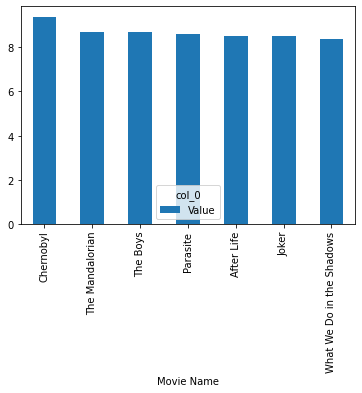

In [224]:
ratingsplot = ratings1.head(7).plot.bar()